In [1]:
import tweepy
import csv
import re
import pandas as pd
from flashtext import KeywordProcessor

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/nust61/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df = pd.read_csv('Corona_tweets.csv')
df

,Unnamed: 0,Time,Location,text
0,1,16/03/2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,2,16/03/2020,UK,advice Talk to your neighbours family to excha...
2,3,16/03/2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...
3,4,16/03/2020,NaN,My food stock is not the only one which is emp...
4,5,16/03/2020,NaN,"Me, ready to go at supermarket during the #COV..."
...,...,...,...,...
41152,41153,14/04/2020,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...
41153,41154,14/04/2020,NaN,Response to complaint not provided citing COVI...
41154,41155,14/04/2020,NaN,You know itÂ’s getting tough when @KameronWild...
41155,41156,14/04/2020,NaN,Is it wrong that the smell of hand sanitizer i...


In [20]:
df.dropna()

,Unnamed: 0,Time,Location,text
0,1,16/03/2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,2,16/03/2020,UK,advice Talk to your neighbours family to excha...
2,3,16/03/2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...
5,6,16/03/2020,"ÃœT: 36.319708,-82.363649",As news of the regionÂ’s first confirmed COVID...
6,7,16/03/2020,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...
...,...,...,...,...
41147,41148,14/04/2020,"Brooklyn, NY",YÂ’all really shitting that much more at home?...
41149,41150,14/04/2020,"Toronto, Ontario",Still shocked by the number of #Toronto superm...
41150,41151,14/04/2020,OHIO,I never that weÂ’d be in a situation &amp; wor...
41152,41153,14/04/2020,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...


In [24]:
df.columns

Index(['Unnamed: 0', 'Time', 'Location', 'text'], dtype='object')

In [46]:
df1 = df.filter(['text','Time'])

In [47]:
df1

In [52]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.?]+", ' ', text)   
    
    return text

In [53]:
df1['text']=df['text'].apply(clean_text)

In [60]:
stopwords = stopwords.words("english")

In [55]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [62]:
# Apply the stopword removal function to the text of all tweets
df1['text']=df1['text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df['text'].head(20)):
    print(i+1, tweet, '\n')
df1['text']=df1['text'].str.lower()
df1

1 @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 

2 advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order 

3 Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P 

4 My food stock is not the only one which is empty...

PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. 
Stay calm, stay safe.

#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j 

5 Me, ready to go at supermarket during the #COVID19 outbreak.

Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It caus

,text,Time
0,gahan,16/03/2020
1,advice talk neighbours family exchange phone n...,16/03/2020
2,coronavirus australia woolworths give elderly ...,16/03/2020
3,"food stock one empty ... please , ' panic , en...",16/03/2020
4,", ready go supermarket #covid19 outbreak. ' pa...",16/03/2020
...,...,...
41152,airline pilots offering stock supermarket shel...,14/04/2020
41153,response complaint provided citing covid 19 re...,14/04/2020
41154,know getting tough rationing toilet paper #cor...,14/04/2020
41155,wrong smell hand sanitizer starting turn ? #co...,14/04/2020


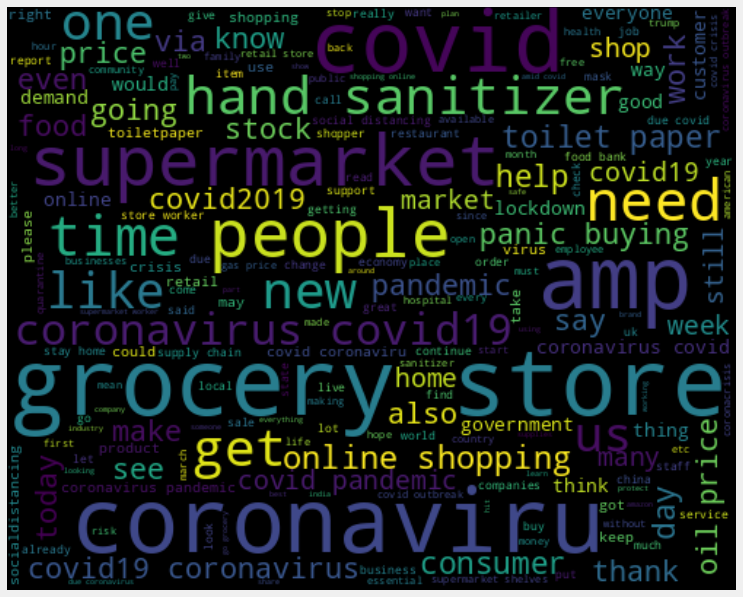

In [63]:
# Plot a word cloud

all_words = ' '.join( [data for data in df1['text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
df1.to_csv('external_dataset_cleaned.csv')